In [37]:
import geopandas as geopd
import matplotlib.pyplot as plt
import scipy
import numpy as np

from numpy.linalg import norm
from shapely import Point, LineString

plt.rcParams['figure.dpi'] = 300

In [2]:
# Reading the files
filepath = "/home/iiro/Documents/Koulutyöt/Gradu/data/georeferointivirhe/georeferointivirhe.gpkg"

new_error = geopd.read_file(filepath, layer="uudet_georeferointivirheet_attribuutit")
old_error = geopd.read_file(filepath, layer="vanhat_georeferointivirheet_attribuutit")

-1.0


In [4]:
new_error['length'] = new_error.length
old_error['length'] = old_error.length
new_error

,year,sheet_id,duplicated,geometry,length
0,1960,221405,False,"LINESTRING (314467.193 6908735.386, 314469.037...",7.624012
1,1960,221405,False,"LINESTRING (322602.785 6902742.457, 322609.433...",8.387732
2,1960,221405,False,"LINESTRING (323721.463 6910719.411, 323724.209...",8.483273
3,1954,243407,False,"LINESTRING (424165.833 7135660.162, 424177.792...",16.727560
4,1954,243407,False,"LINESTRING (421769.233 7127451.660, 421780.699...",12.069124
...,...,...,...,...,...
205,1974,254108,True,"LINESTRING (390437.485 7298506.335, 390435.417...",2.185159
206,1974,254108,True,"LINESTRING (382858.533 7298798.128, 382866.730...",8.380383
207,1970,364105,True,"LINESTRING (518379.305 7409856.808, 518395.084...",18.513568
208,1970,364105,True,"LINESTRING (514787.070 7408242.028, 514782.911...",17.712486


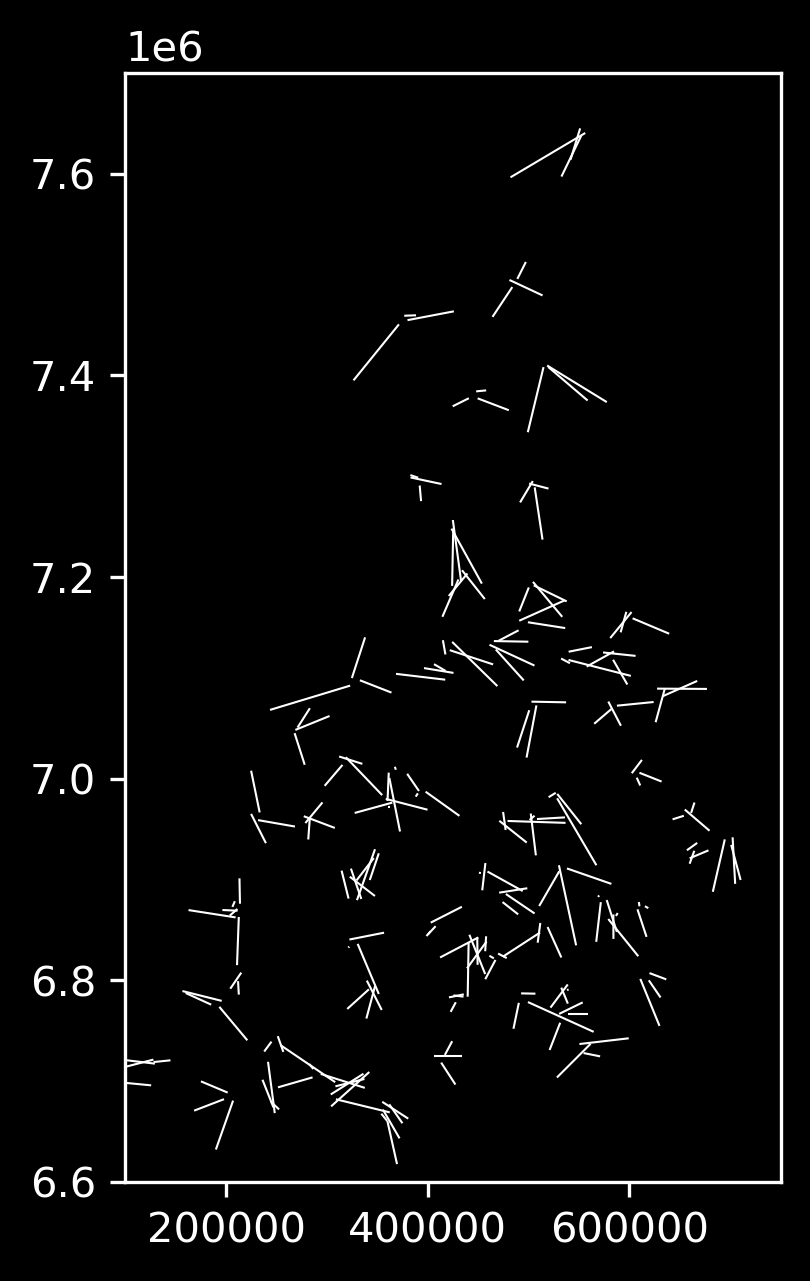

In [35]:
def exaggerate_lines(geodataframe, exagg_coef=3750):
    """ Returns geodataframe with exaggerated line (single segment)
    """
    # too lazy to rename variables
    
    new_error = geodataframe
    for i, row in new_error.iterrows():
        new_error.at[i, 'true_x'], new_error.at[i, 'true_y'] = new_error.loc[i,'geometry'].coords[0]
        new_error.at[i, 'apparent_x'], new_error.at[i, 'apparent_y'] = new_error.loc[i,'geometry'].coords[1]
    new_error['x_length'] = new_error['apparent_x'] - new_error['true_x']
    new_error['y_length'] = new_error['apparent_y'] - new_error['true_y'] 
    
    new_error['x_exaggeration'] = new_error['x_length'] * exagg_coef
    new_error['y_exaggeration'] = new_error['y_length'] * exagg_coef
    
    new_error['exagg_x'] = new_error['true_x'] + new_error['x_exaggeration']
    new_error['exagg_y'] = new_error['true_y'] + new_error['y_exaggeration']
    
    for i, row in new_error.iterrows():
        new_error.at[i, 'exagg_geometry'] = LineString([Point(new_error.at[i, 'true_x'], new_error.at[i, 'true_y']), Point(new_error.at[i, 'exagg_x'], new_error.at[i, 'exagg_y'])])
    
    new_exagg_geom = new_error.set_geometry('exagg_geometry', crs=new_error.crs)
    new_exagg_geom = new_exagg_geom.drop('geometry', axis=1)
    new_exagg_geom = new_exagg_geom.rename_geometry('geometry')
    return new_exagg_geom
new_exagg_geom = exaggerate_lines(new_error)
old_exagg_geom = exaggerate_lines(old_error)

def length_rmse(dataframe):
    return np.sqrt(np.mean(dataframe['length']**2))


new_exagg_geom.plot(linewidth=0.5)
plt.ylim((6.6 * 1e6, 7.7 *1e6))
plt.xlim(100000, 750000)
plt.show()



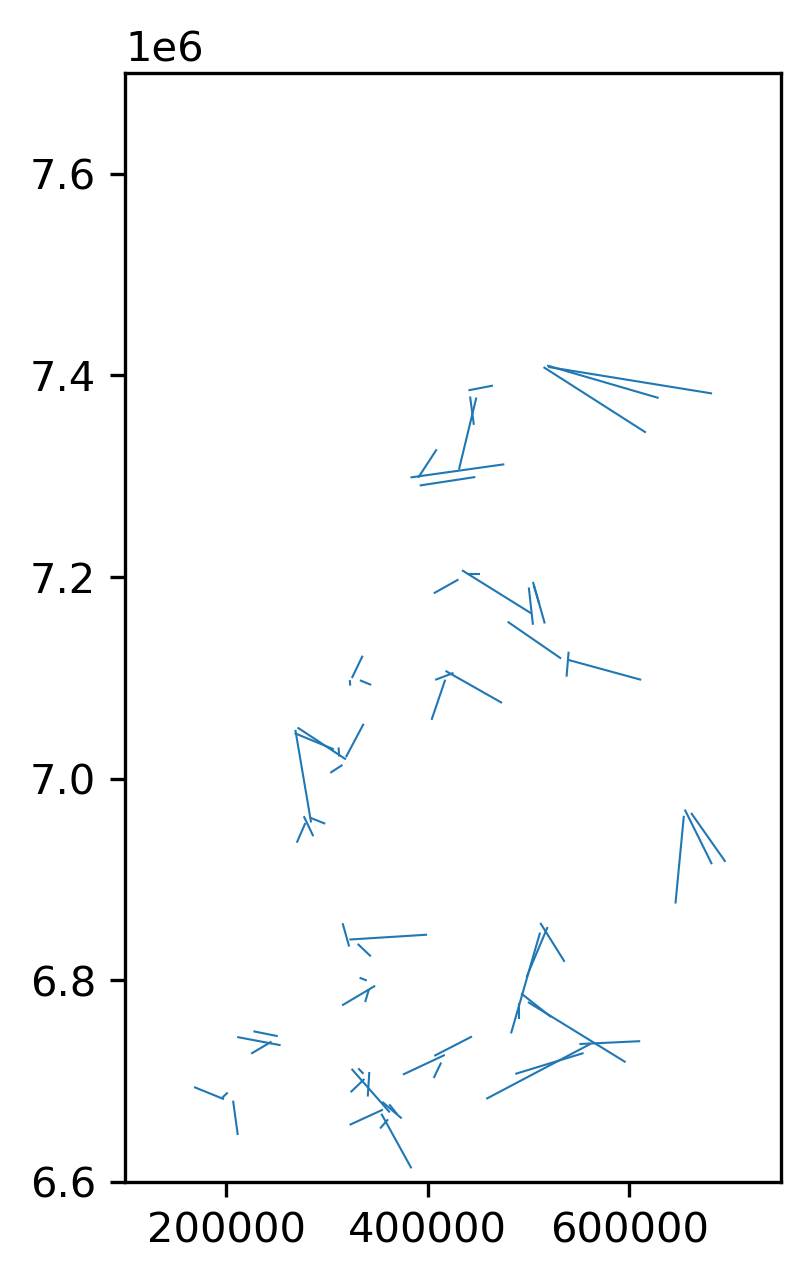

In [6]:
old_exagg_geom.plot(linewidth=0.5)
plt.ylim((6.6 * 1e6, 7.7 *1e6))
plt.xlim(100000, 750000)
plt.show()

In [7]:
#new_exagg_geom.to_file(filepath, driver='GPKG', layer='liioitellut_uudet')
#old_exagg_geom.to_file(filepath, driver='GPKG', layer='liioitellut_vanhat')

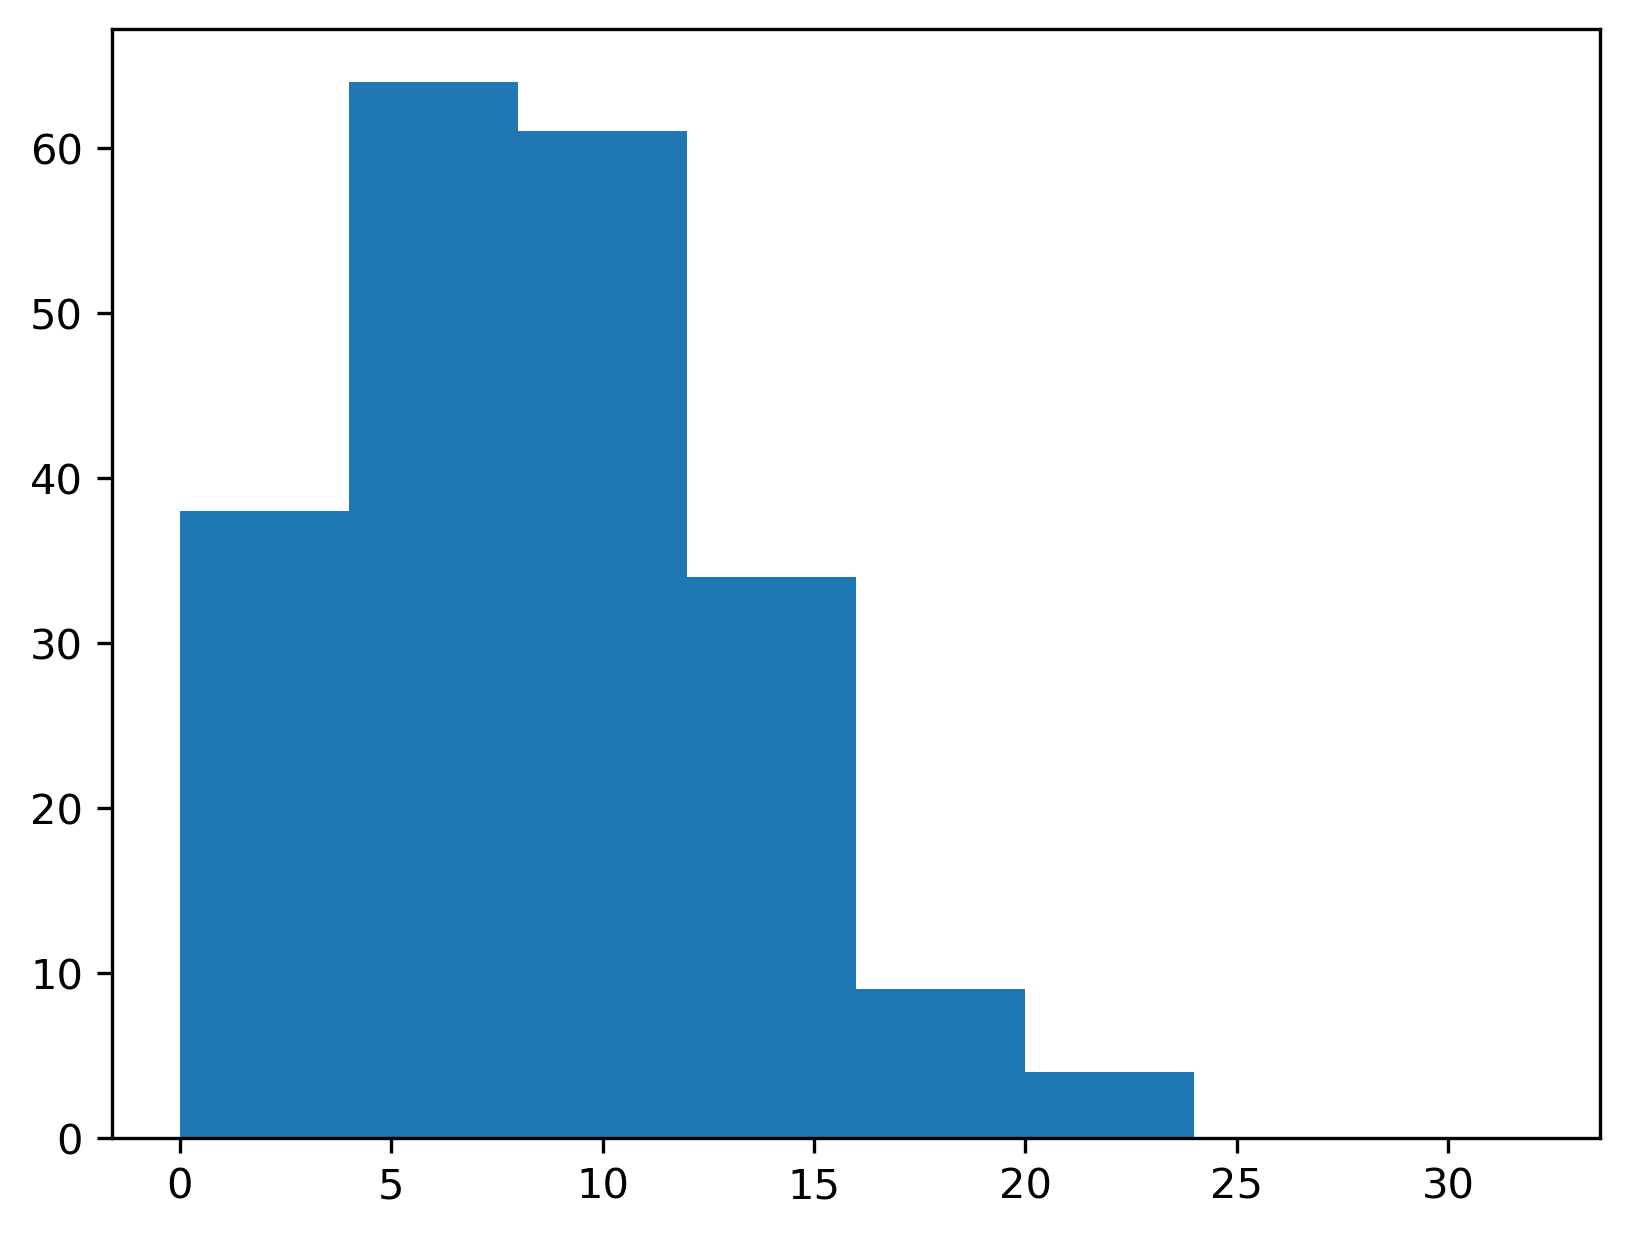

In [8]:
plotted = plt.hist(new_error['length'], bins=8, range=(0, 32))

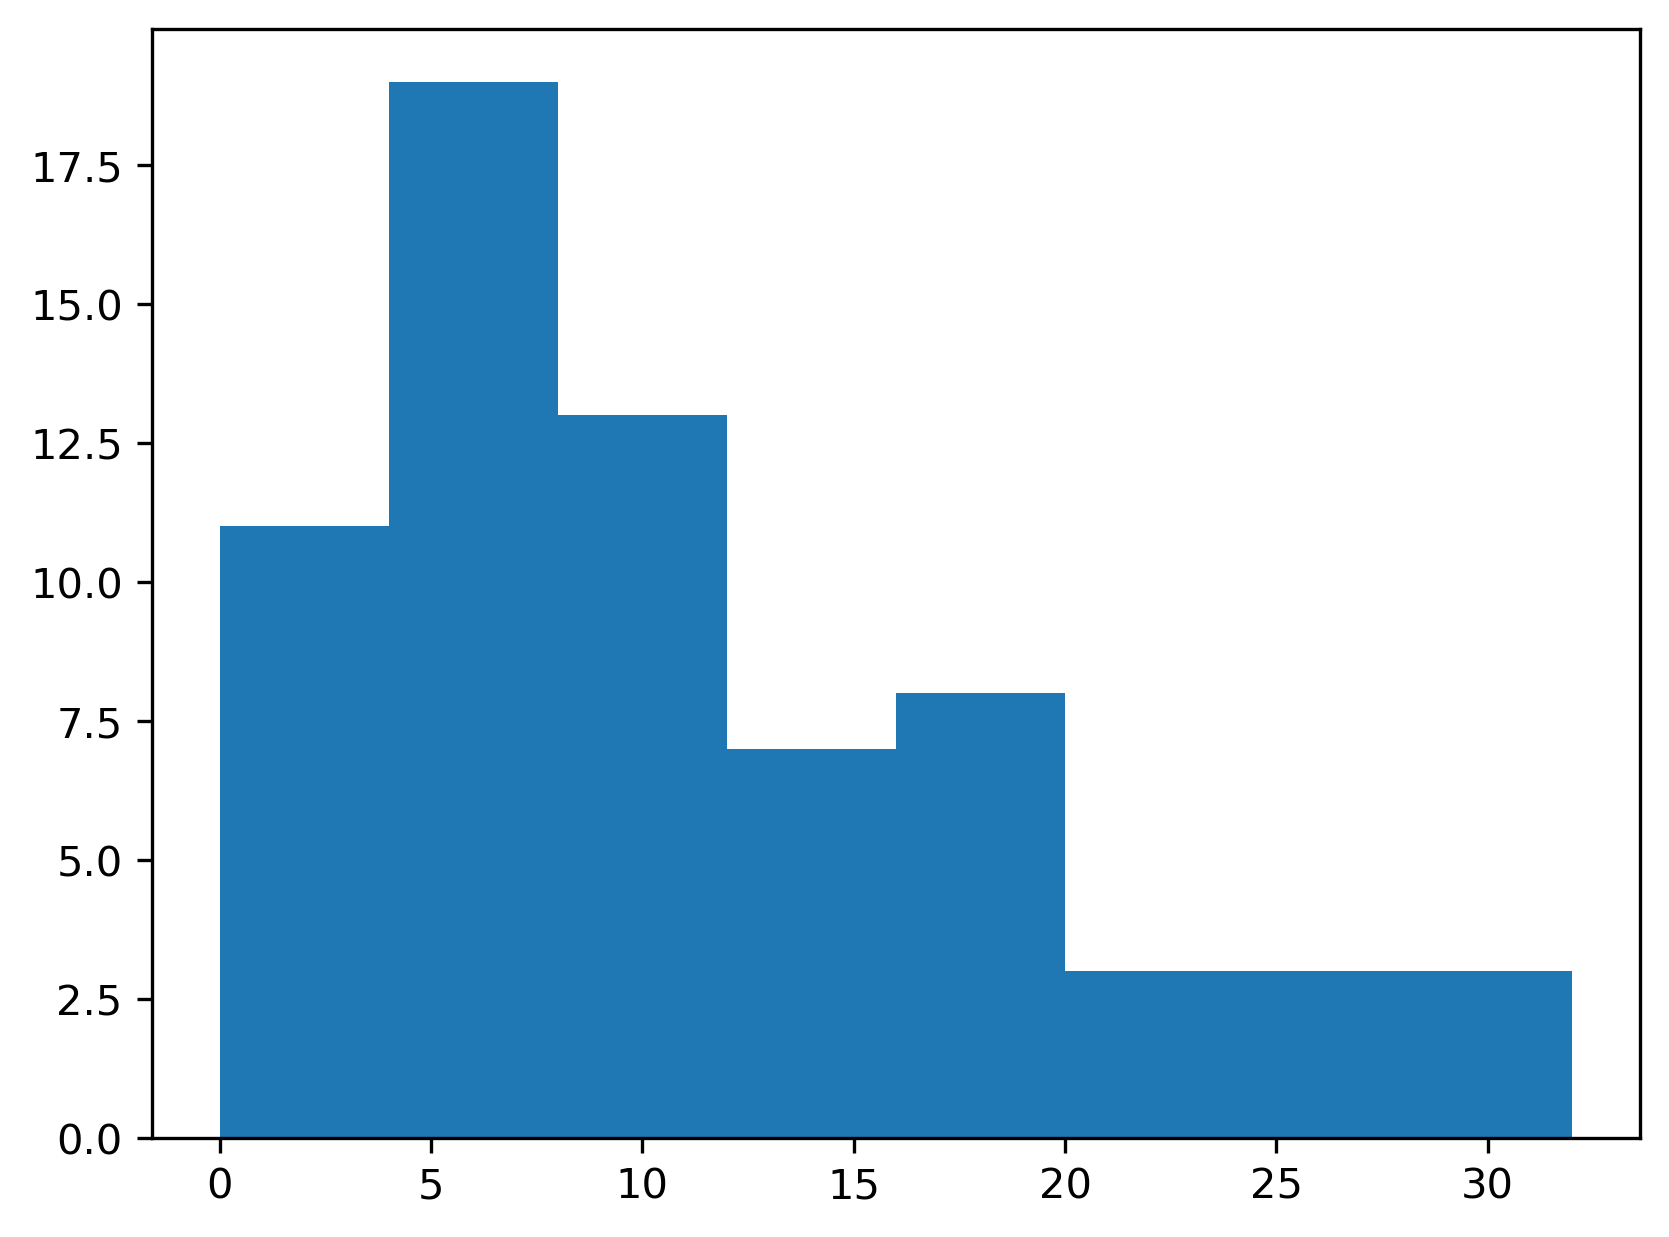

In [9]:
plotted = plt.hist(old_error['length'], bins=8, range=(0, 32))

In [11]:
grouped_new = new_error.sort_values(['sheet_id', 'length'],ascending=True).groupby('sheet_id').head(3)
grouped_old = old_error.sort_values(['sheet_id', 'length'],ascending=True).groupby('sheet_id').head(3)
grouped_new.head(12)

,year,sheet_id,duplicated,geometry,length,true_x,true_y,apparent_x,apparent_y,x_length,y_length,x_exaggeration,y_exaggeration,exagg_x,exagg_y,exagg_geometry
11,1968,101203,False,"LINESTRING (89769.272 6691771.172, 89771.217 6...",7.729466,89769.272450,6.691771e+06,89771.217445,6.691779e+06,1.944995,7.480751,7293.732599,28052.817687,97063.005049,6.719824e+06,LINESTRING (89769.27244970026 6691771.17246767...
9,1968,101203,False,"LINESTRING (88855.828 6699245.602, 88865.608 6...",9.824677,88855.828000,6.699246e+06,88865.607657,6.699245e+06,9.779657,-0.939464,36673.713213,-3522.991540,125529.541213,6.695723e+06,"LINESTRING (88855.828 6699245.602, 125529.5412..."
10,1968,101203,False,"LINESTRING (96076.643 6690922.207, 96076.942 6...",12.172367,96076.643043,6.690922e+06,96076.942273,6.690934e+06,0.299230,12.168689,1122.112708,45632.583441,97198.755751,6.736555e+06,LINESTRING (96076.64304322138 6690922.20692895...
22,1968,102112,False,"LINESTRING (127873.574 6718824.360, 127878.060...",4.509864,127873.573655,6.718824e+06,127878.059984,6.718825e+06,4.486329,0.460136,16823.735010,1725.511282,144697.308665,6.720550e+06,LINESTRING (127873.57365509955 6718824.3603547...
23,1968,102112,False,"LINESTRING (129217.146 6717242.118, 129209.477...",7.723958,129217.146211,6.717242e+06,129209.477272,6.717243e+06,-7.668939,0.920273,-28758.521384,3451.022567,100458.624827,6.720693e+06,LINESTRING (129217.14621103504 6717242.1176344...
21,1968,102112,False,"LINESTRING (127762.106 6721251.925, 127750.027...",12.471520,127762.105626,6.721252e+06,127750.027047,6.721249e+06,-12.078579,-3.105920,-45294.671180,-11647.201160,82467.434446,6.709605e+06,LINESTRING (127762.10562621467 6721251.9246618...
184,1969,103212,True,"LINESTRING (201445.530 6688527.484, 201438.456...",7.673388,201445.530450,6.688527e+06,201438.456148,6.688530e+06,-7.074302,2.972396,-26528.631466,11146.483817,174916.898984,6.699674e+06,LINESTRING (201445.53045000517 6688527.4835948...
183,1969,103212,True,"LINESTRING (197802.295 6681985.389, 197794.388...",8.467937,197802.294786,6.681985e+06,197794.388214,6.681982e+06,-7.906573,-3.031844,-29649.646931,-11369.413482,168152.647855,6.670616e+06,LINESTRING (197802.29478616186 6681985.3893179...
185,1969,103212,True,"LINESTRING (206805.956 6680546.750, 206801.408...",13.706387,206805.956254,6.680547e+06,206801.408489,6.680534e+06,-4.547765,-12.929921,-17054.120227,-48487.204565,189751.836027,6.632060e+06,LINESTRING (206805.95625439318 6680546.7498077...
150,1968,103414,False,"LINESTRING (252446.046 6671829.668, 252443.901...",2.939341,252446.045625,6.671830e+06,252443.901266,6.671832e+06,-2.144359,2.010337,-8041.346093,7538.761965,244404.699532,6.679368e+06,LINESTRING (252446.045625349 6671829.667783652...


In [21]:
smallest_error_group = grouped_new.iloc[::3]
middle_error_group = grouped_new.iloc[1::3]
largest_error_group = grouped_new.iloc[2::3]

#smallest_error_group.head(9)

smallest_old_error_group = grouped_old.iloc[::3]
middle_old_error_group = grouped_old.iloc[1::3]
largest_old_error_group = grouped_old.iloc[2::3]

#smallest_error_group.head(9)

In [24]:
new_rmse = np.sqrt(np.mean(new_error['length']**2))

smallest_new_rmse = length_rmse(smallest_error_group) 
middle_new_rmse = length_rmse(middle_error_group) 
largest_new_rmse = length_rmse(largest_error_group) 

old_rmse = np.sqrt(np.mean(old_error['length']**2))

smallest_old_rmse = length_rmse(smallest_old_error_group) 
middle_old_rmse = length_rmse(middle_old_error_group)
largest_old_rmse = length_rmse(largest_old_error_group)
print(f"Kaikki uudet: {new_rmse}")
print(f"pienet uudet: {smallest_new_rmse}")
print(f"Keskimmäiset uudet: {middle_new_rmse}")
print(f"Suurimmat uudet: {largest_new_rmse}")


print(f"Kaikki vanhat: {old_rmse}")
print(f"pienet vanhat: {smallest_old_rmse}")
print(f"Keskimmäiset vanhat: {middle_old_rmse}")
print(f"Suurimmat vanhat: {largest_old_rmse}")


Kaikki uudet: 9.640027266095556
pienet uudet: 5.868697140407212
Keskimmäiset uudet: 8.875736358359184
Suurimmat uudet: 12.867403585971584
Kaikki vanhat: 14.922884821770795
pienet vanhat: 9.601230976931745
Keskimmäiset vanhat: 12.697467383927469
Suurimmat vanhat: 20.363402465531536


(0.0, 45.0)

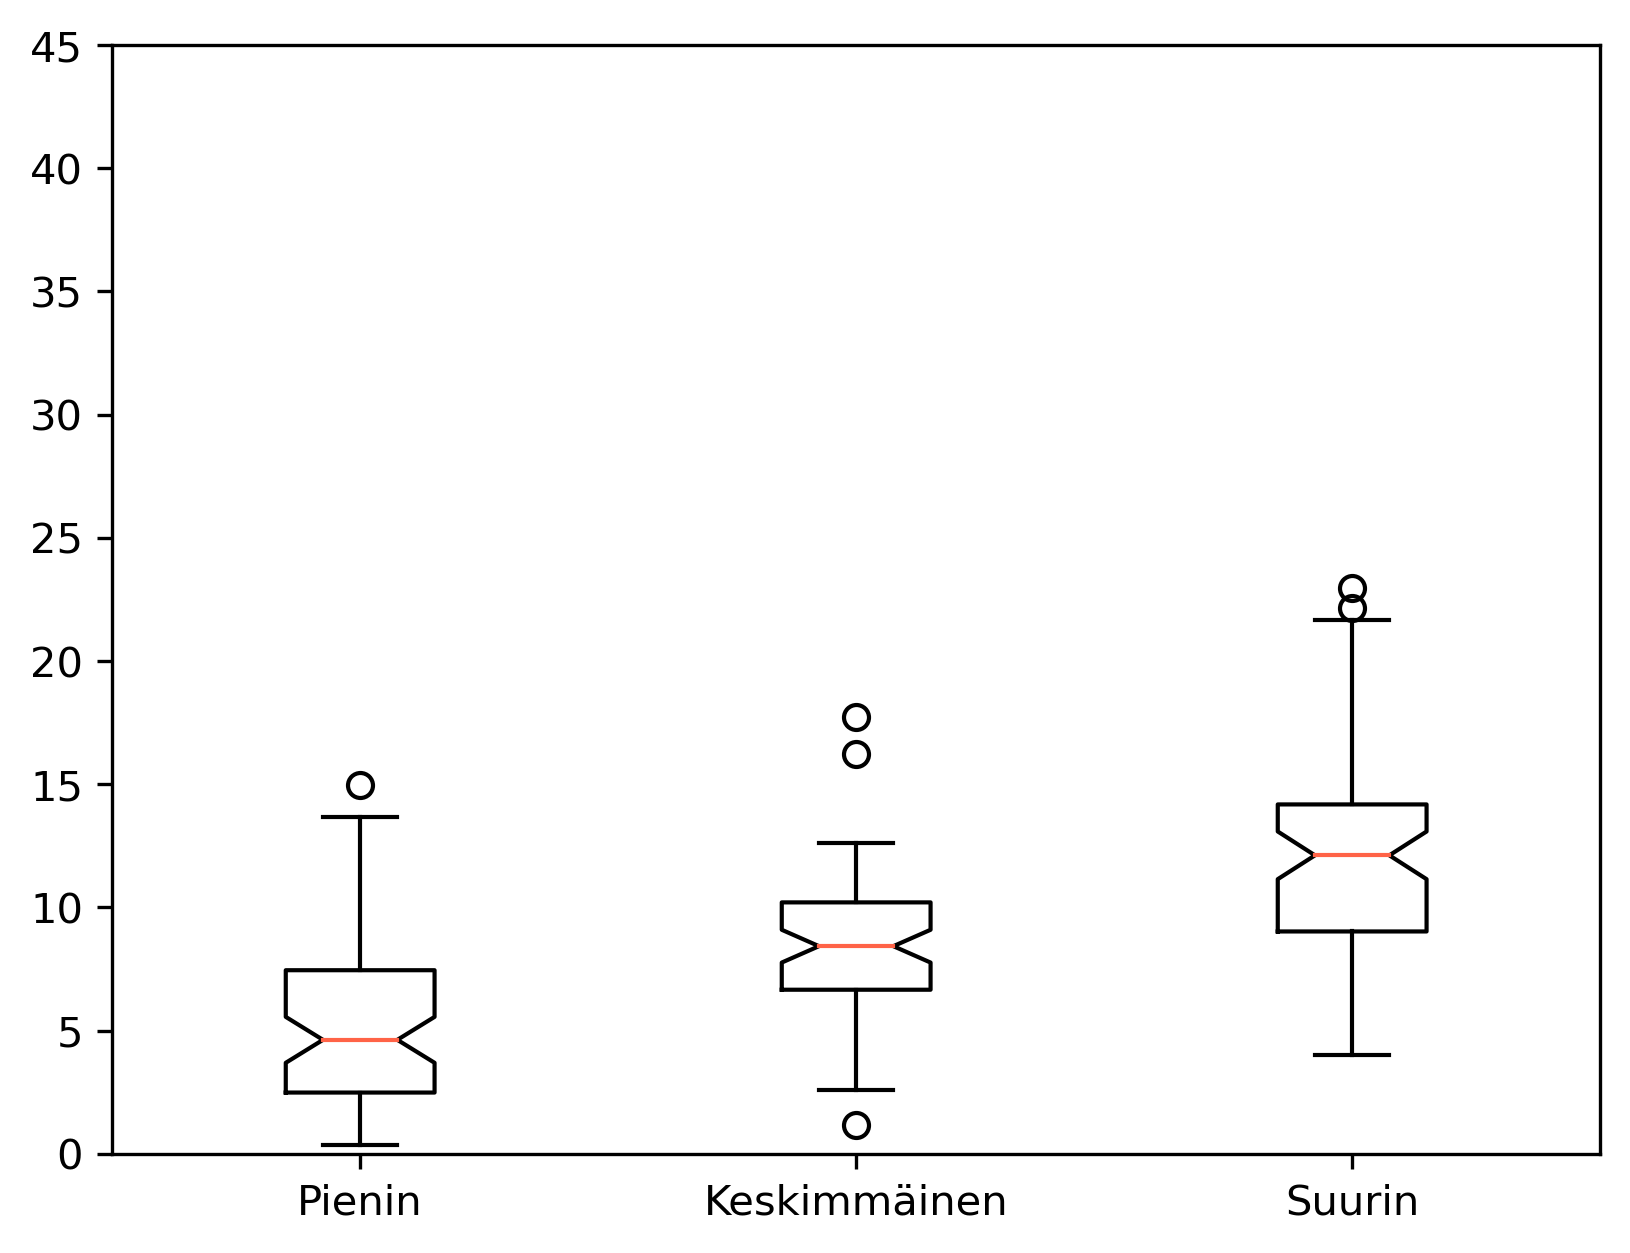

In [13]:
medianprops = {'c':'tomato'}

boxes = plt.boxplot([smallest_error_group['length'], middle_error_group['length'], largest_error_group['length']], notch=True, labels=['Pienin', 'Keskimmäinen', 'Suurin'], patch_artist=False, medianprops=medianprops)
plt.style.use('dark_background')
plt.ylim(0, 45)

(0.0, 45.0)

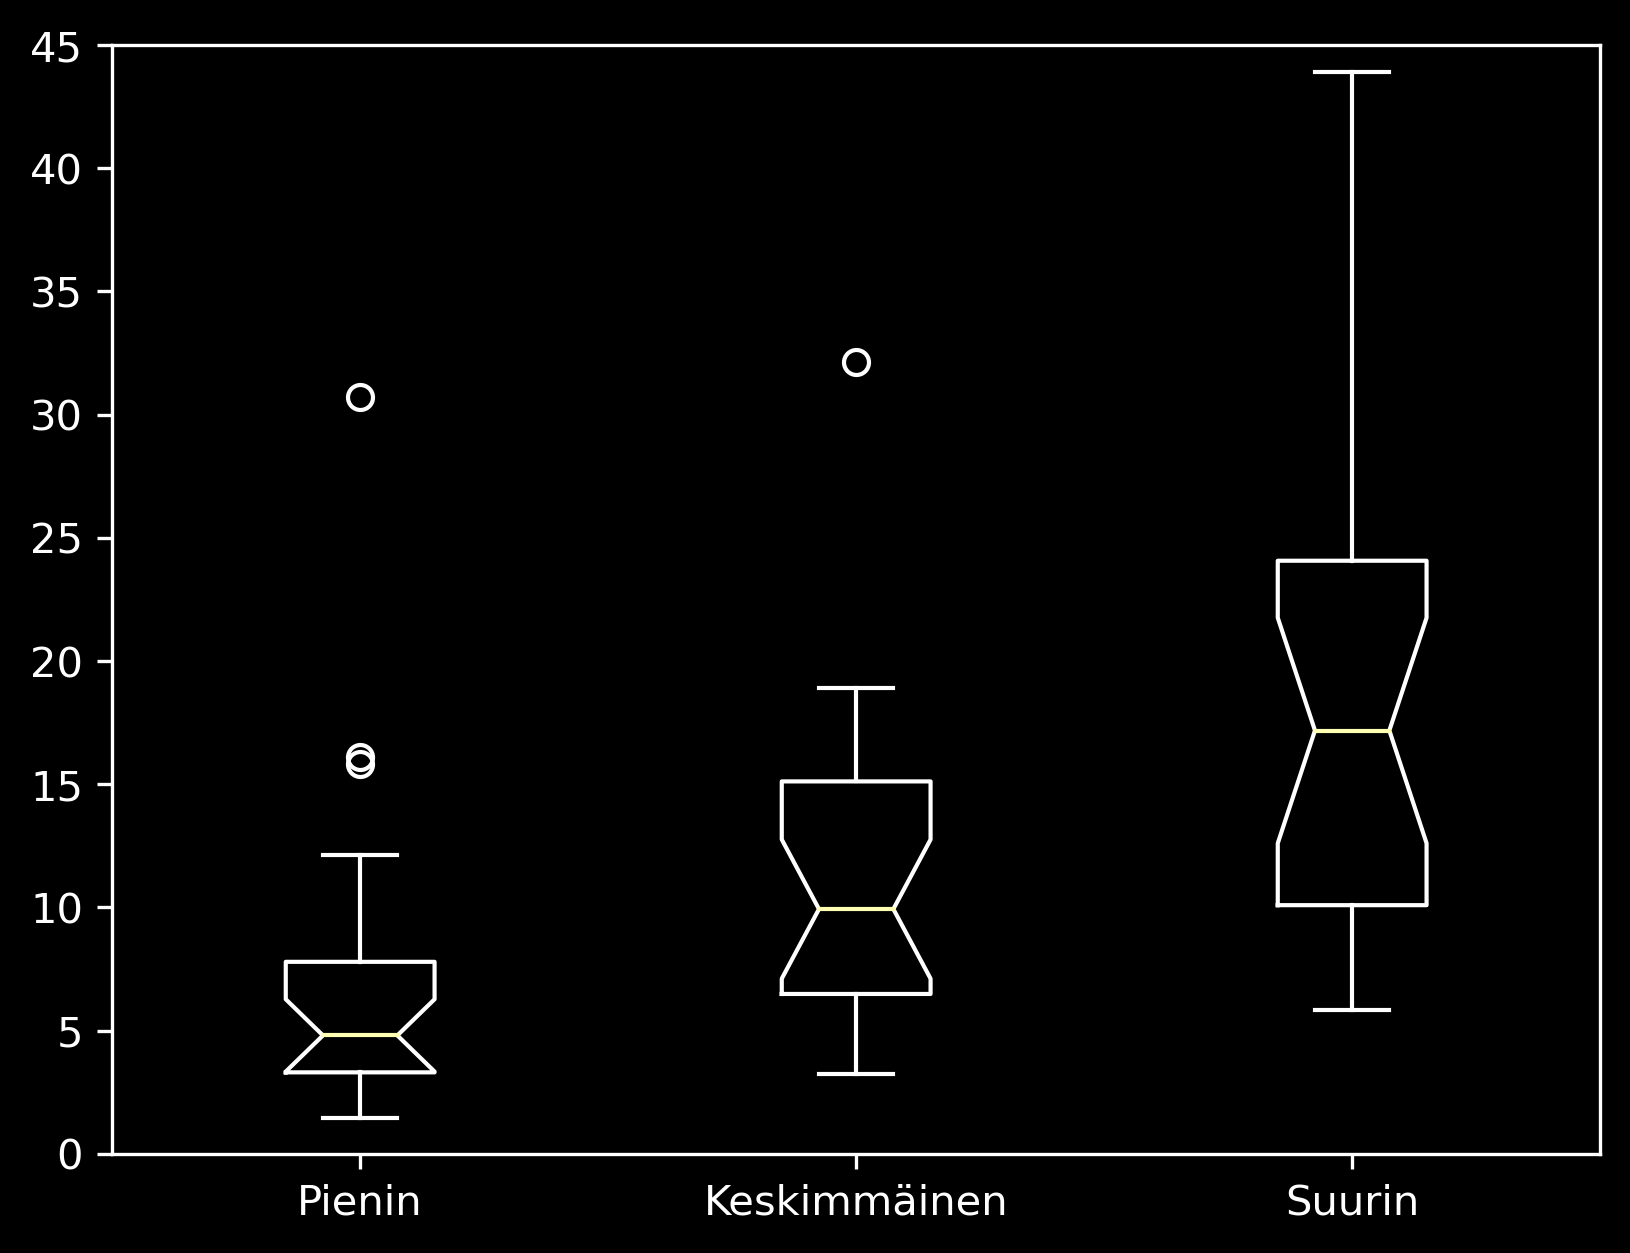

In [14]:
boxes = plt.boxplot([smallest_old_error_group['length'], middle_old_error_group['length'], largest_old_error_group['length']], notch=True, labels=['Pienin', 'Keskimmäinen', 'Suurin'])
plt.style.use('dark_background')
plt.ylim(0, 45)

In [15]:
print(new_exagg_geom.crs)

EPSG:3067


In [16]:
type(grouped_new)

geopandas.geodataframe.GeoDataFrame

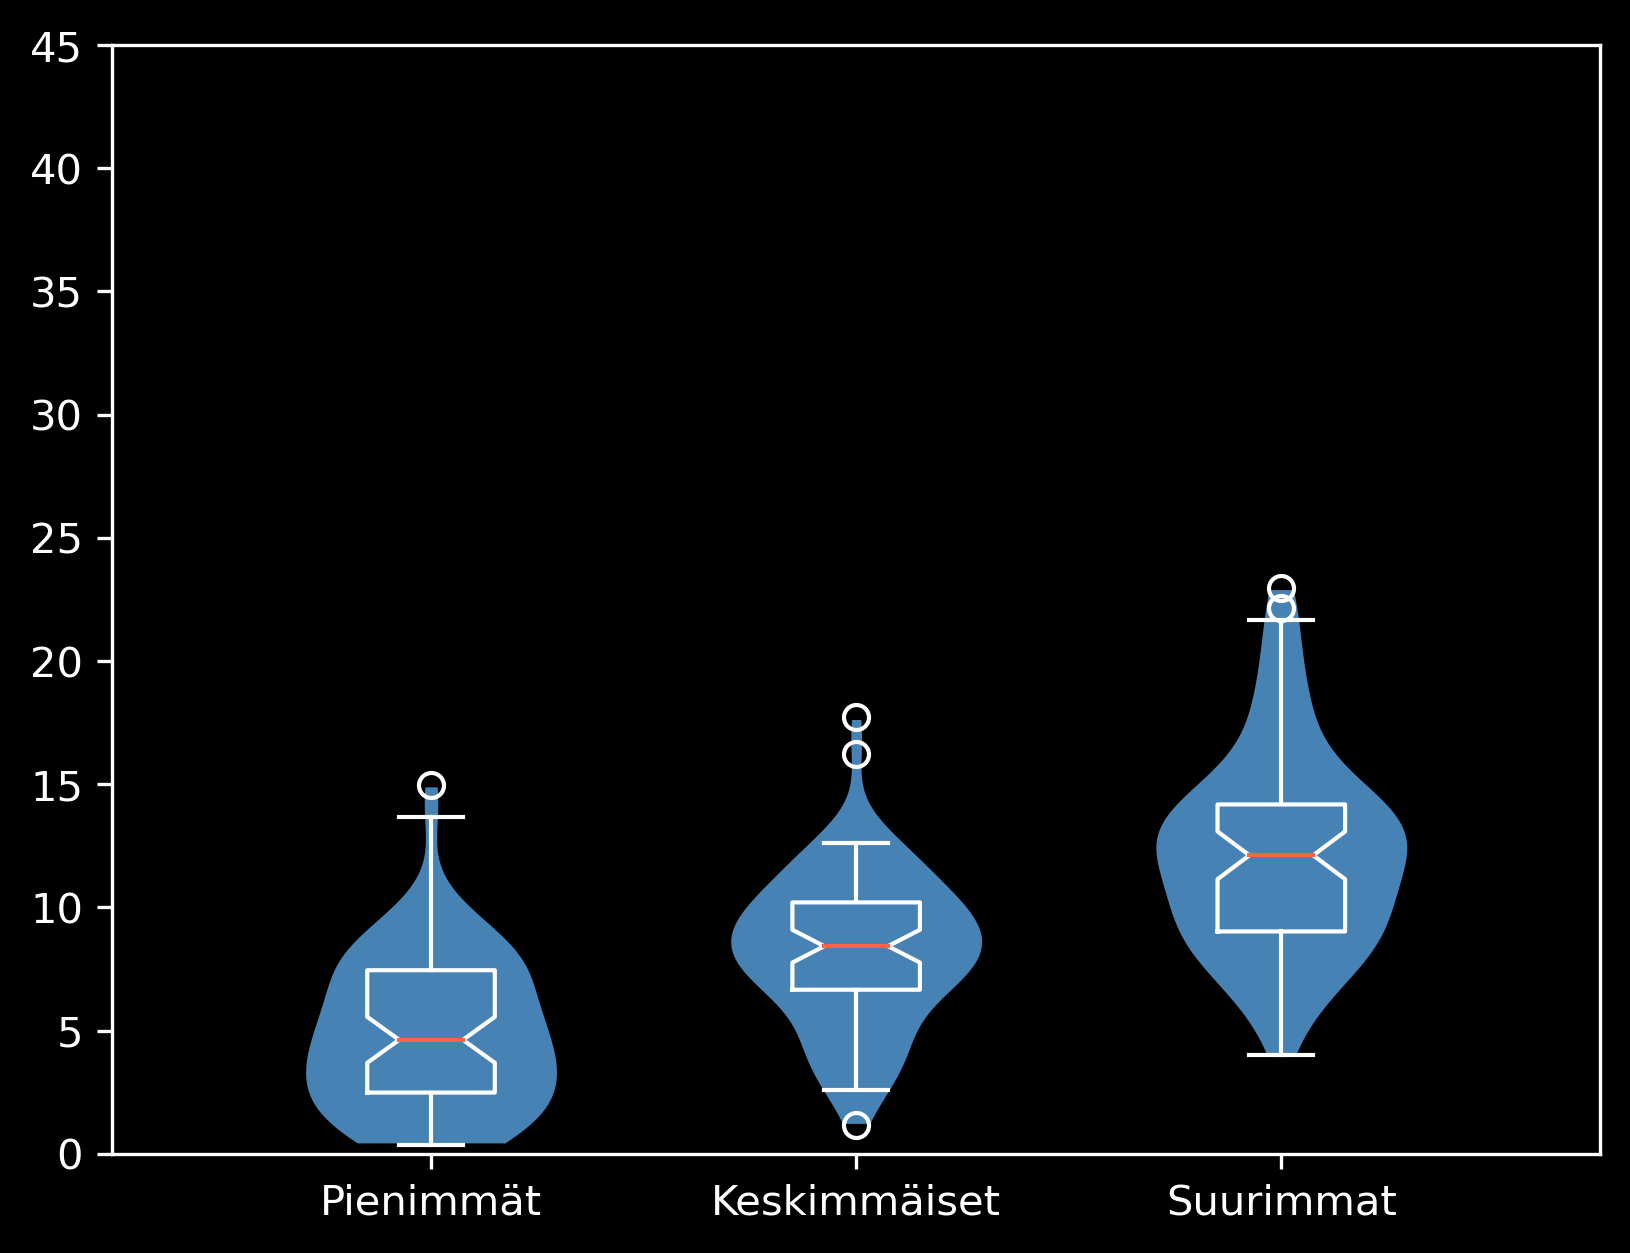

In [17]:
def set_axis_style(ax, labels):
    """From https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py
    """
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sijaintivirheet luokiteltuna karttalehden sisäiseen suuruusjärjestykseen')
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

labels=['Pienimmät', 'Keskimmäiset', 'Suurimmat']   

medianprops = {'c':'tomato'}

data = [smallest_error_group['length'], middle_error_group['length'], largest_error_group['length']]

ax = plt.subplot()

parts = ax.violinplot(data, positions=[1, 2, 3], widths=0.6, showmedians=False, showextrema=False)
"""
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = parts[partname]
    vp.set_edgecolor('white')
    vp.set_linewidth(1)
"""   
boxes = ax.boxplot(data, notch=True, medianprops=medianprops)

for pc in parts['bodies']:
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)



set_axis_style(ax, labels)
plt.ylim(0, 45)

plt.savefig("/home/iiro/Documents/Koulutyöt/Gradu/visualisointi/tulokset/newer_georef_violin.png", dpi=300, bbox_inches='tight')
plt.show()



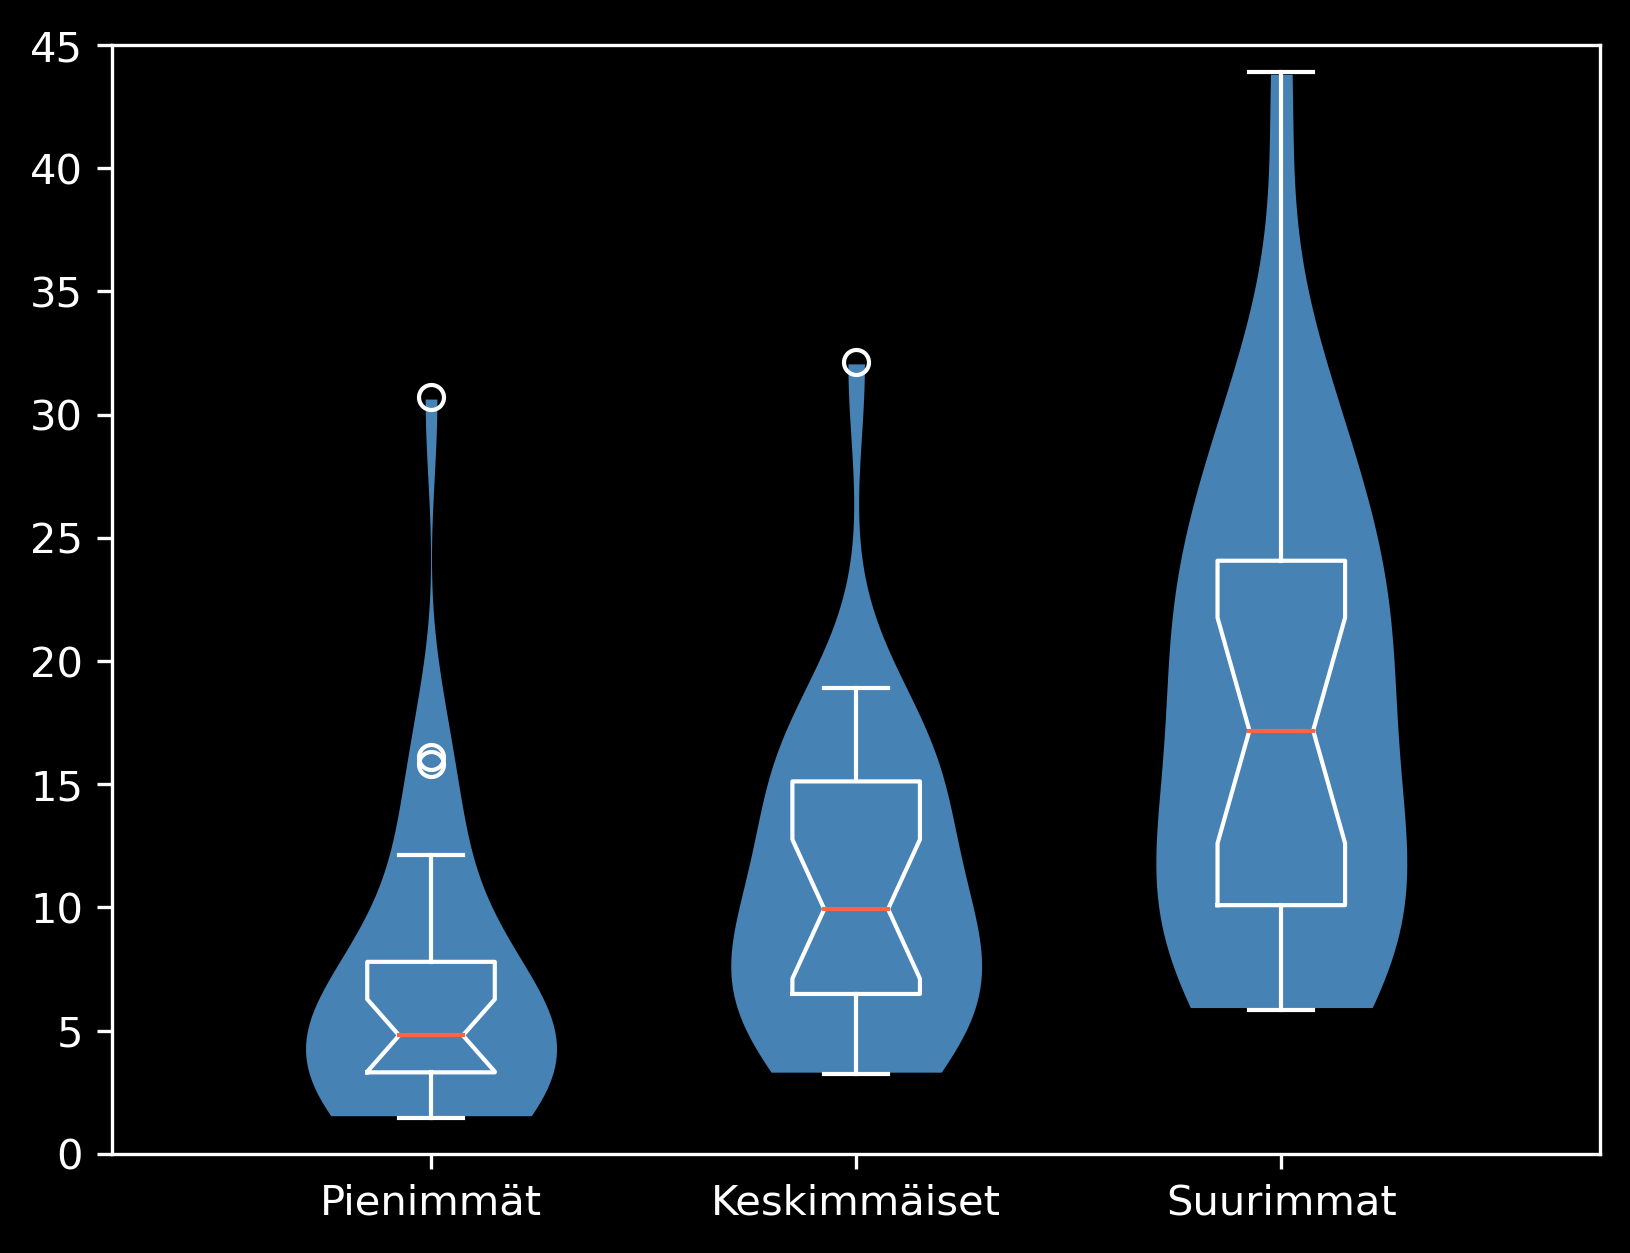

In [18]:
data = [smallest_old_error_group['length'], middle_old_error_group['length'], largest_old_error_group['length']]

ax = plt.subplot()

medianprops = {'c':'tomato'}

parts = ax.violinplot(data, positions=[1, 2, 3], widths=0.6, showmedians=False, showextrema=False)
"""
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = parts[partname]
    vp.set_edgecolor('white')
    vp.set_linewidth(1)
"""   
boxes = ax.boxplot(data, notch=True, labels=['Pienin', 'Keskimmäinen', 'Suurin'], medianprops=medianprops)

for pc in parts['bodies']:
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)



set_axis_style(ax, labels)
plt.ylim(0, 45)
plt.savefig("/home/iiro/Documents/Koulutyöt/Gradu/visualisointi/tulokset/older_georef_violin.png", dpi=300, bbox_inches='tight')
plt.show()

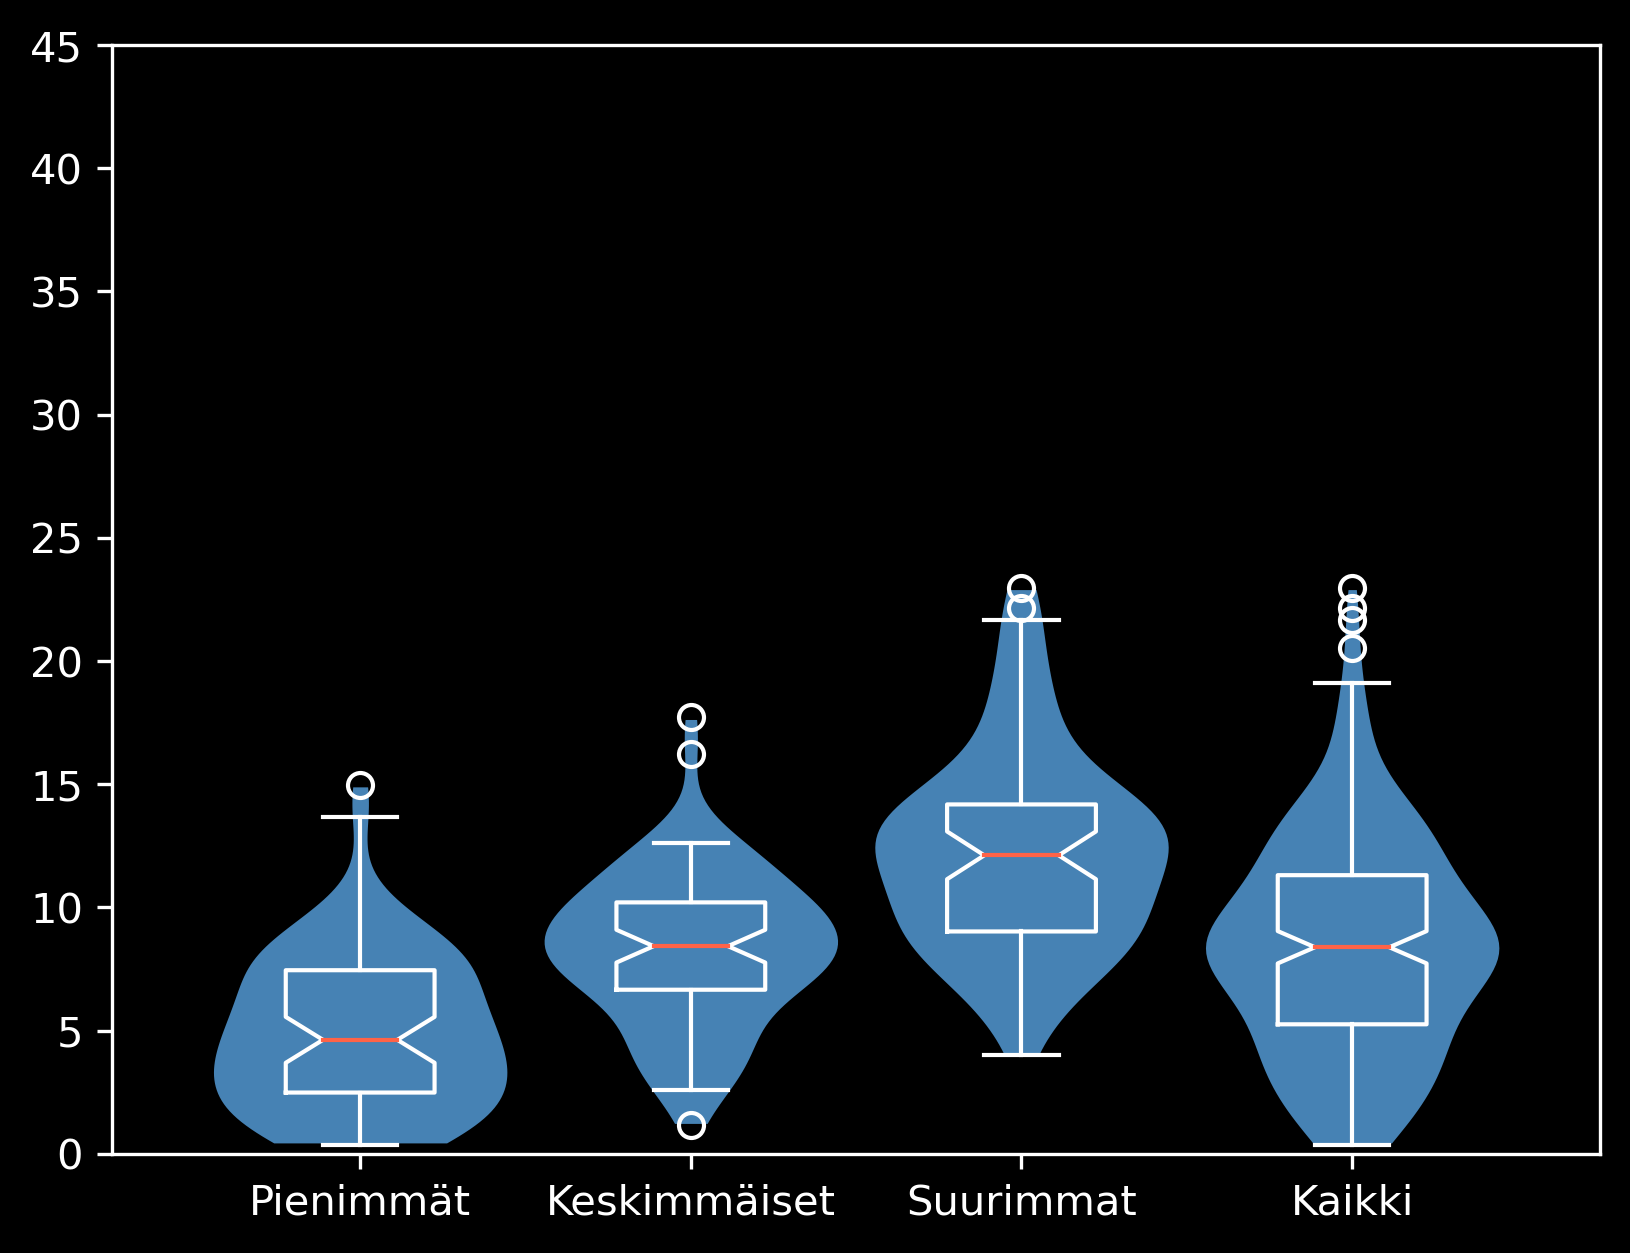

In [31]:
labels=['Pienimmät', 'Keskimmäiset', 'Suurimmat', 'Kaikki']   

medianprops = {'c':'tomato'}

data = [smallest_error_group['length'], middle_error_group['length'], largest_error_group['length'], new_error['length']]

ax = plt.subplot()

parts = ax.violinplot(data, positions=[1, 2, 3, 4], widths=0.9, showmedians=False, showextrema=False)
"""
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = parts[partname]
    vp.set_edgecolor('white')
    vp.set_linewidth(1)
"""   
boxes = ax.boxplot(data, notch=True, medianprops=medianprops)

for pc in parts['bodies']:
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)



set_axis_style(ax, labels)
plt.ylim(0, 45)

plt.savefig("/home/iiro/Documents/Koulutyöt/Gradu/visualisointi/tulokset/newer_georef_violin.png", dpi=300, bbox_inches='tight')
plt.show()

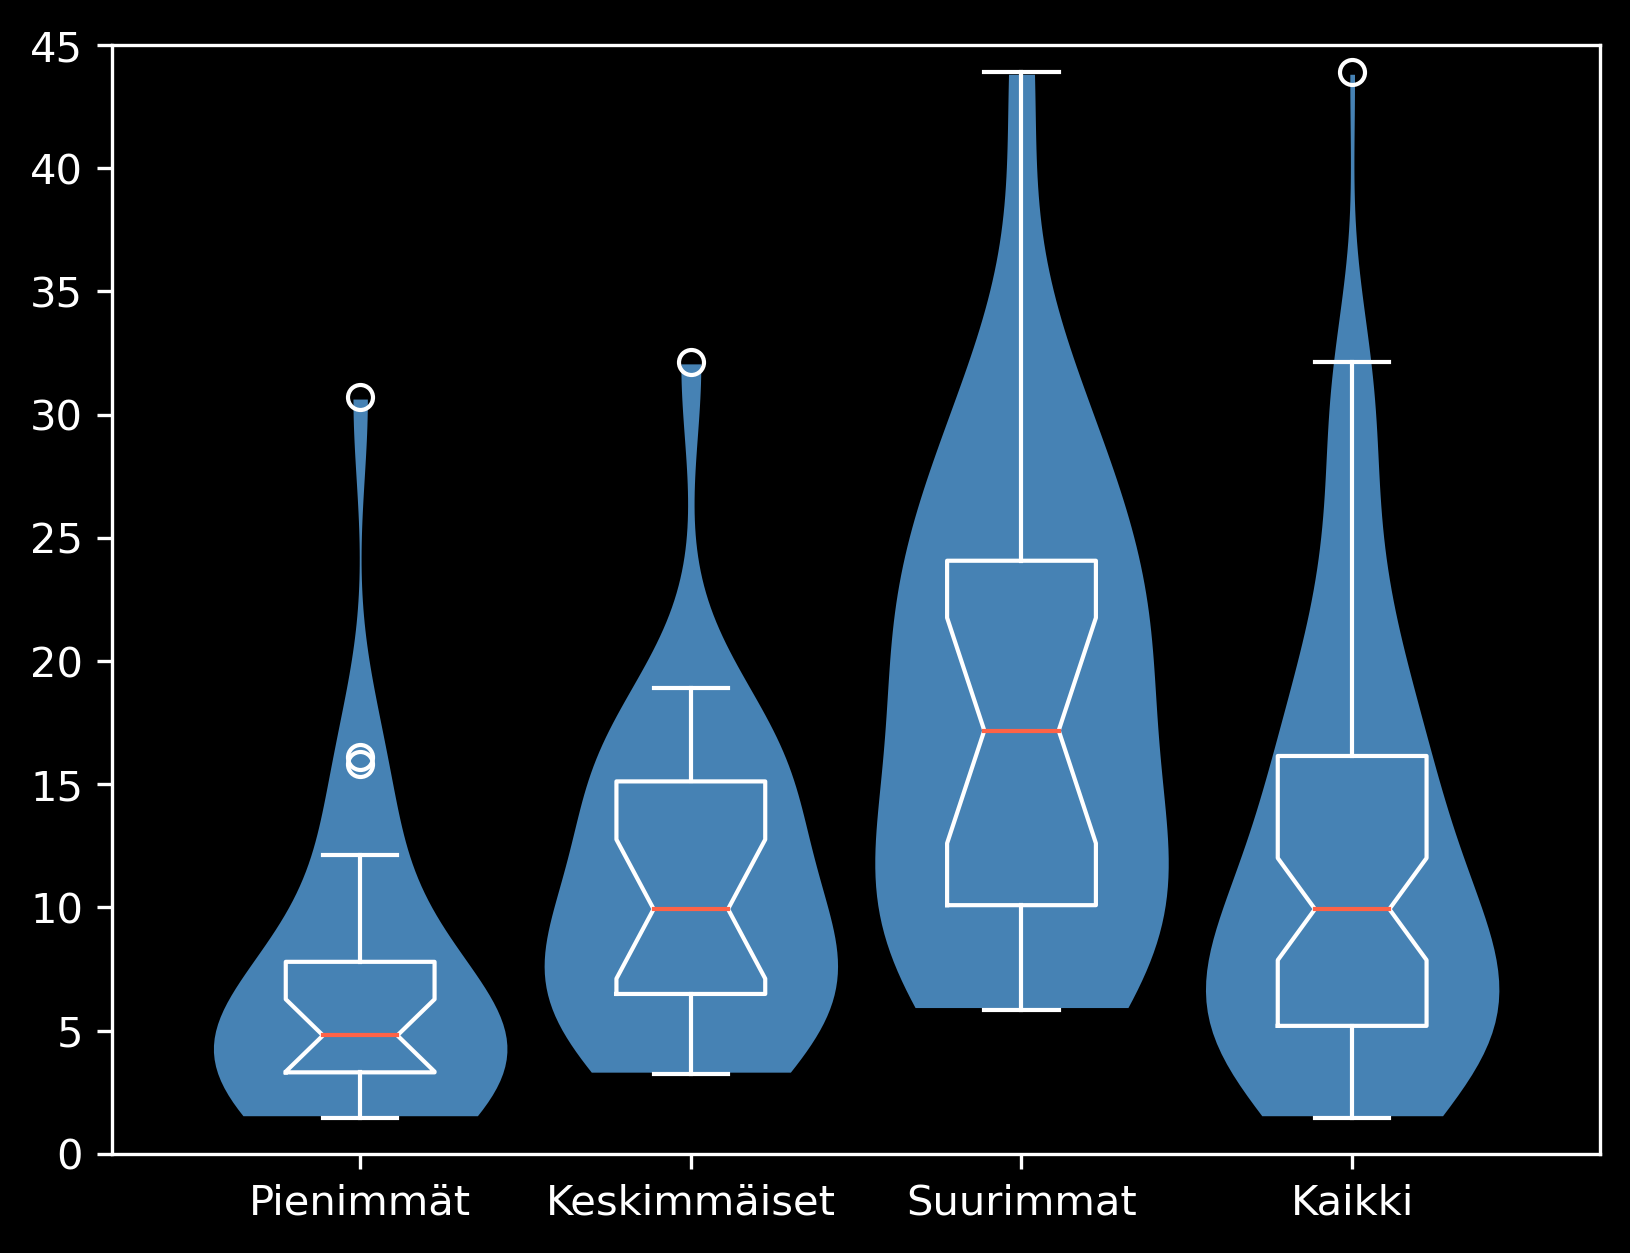

In [30]:
data = [smallest_old_error_group['length'], middle_old_error_group['length'], largest_old_error_group['length'], old_error['length']]

ax = plt.subplot()

medianprops = {'c':'tomato'}

parts = ax.violinplot(data, positions=[1, 2, 3, 4], widths=0.9, showmedians=False, showextrema=False)
"""
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = parts[partname]
    vp.set_edgecolor('white')
    vp.set_linewidth(1)
"""   
boxes = ax.boxplot(data, notch=True, medianprops=medianprops)

for pc in parts['bodies']:
    pc.set_facecolor('steelblue')
    pc.set_edgecolor('black')
    pc.set_alpha(1)



set_axis_style(ax, labels)
plt.ylim(0, 45)
plt.savefig("/home/iiro/Documents/Koulutyöt/Gradu/visualisointi/tulokset/older_georef_violin.png", dpi=300, bbox_inches='tight')
plt.show()